# Project: Investigate IMDB dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose the IMDB movies dataset.

I want to analyze rating and genres of the movies in this dataset.  
I am going to explore following questions:
- Are long or short movies get higher user rating?
- Are old or new movies get higher user rating?
- What genres are the most popular in this dataset?
- What genres are getting higher rating?

In [1]:
# import all the packages that I plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First, we need to load data.
Then we need to inspect data:
- what kind of values are there, how are they stored?
- what data types are the values?
- are there missing values?
- are there duplicates?

In [2]:
# load dataset
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Looking at the example records it is good to notice that **genres** contain multiple values separated by pipe (|) characters.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From this info we can see that some columns are missing values.  
I am interested in **genres**, which has 23 records with missing value. I think 23 out of 10866 will not affect my analysis too much.  
**runtime**, **release_year** and **vote_average** have all values and they are stored as _integer_ and _float_, which is perfect for my analysis.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


These statistics give some interesting information on the dataset.  
Looking at **budget** and **revenue** we can see that at least half of values are __0__.
I think it makes it difficult to do analysis based on these columns.  
Also we can see that movies in this dataset are with release year from 1960 to 2015.  
User rating (**vote_average**) is between 1.5 and 9.2 with average 5.97.  
There are some movies with <b>0</b> **runtime**. I wonder how many?

In [5]:
# how many movies with runtime = 0?
df.query("runtime == 0").runtime.count()

31

So, 31 movies don't have data on the length of the movie.

Let's see if there are duplicates in this dataset.

In [6]:
# show duplicates based on "original_title" and "release_year"
df[df.duplicated(subset=["original_title","release_year"], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,9.670000e+05
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,9.670000e+05
2508,11944,tt0178145,0.406308,20000000,0,Joan of Arc,Leelee Sobieski|Powers Boothe|Neil Patrick Har...,NaN,Christian Duguay,She died at 19. 500 years later her legend liv...,...,"Ten years before her death, Joan hears voices....",140,Drama|History,NaN,5/16/99,13,5.8,1999,2.618106e+07,0.000000e+00
2571,10047,tt0151137,0.235223,60000000,66976317,Joan of Arc,Milla Jovovich|Dustin Hoffman|Faye Dunaway|Joh...,NaN,Luc Besson,NaN,...,In 1429 a teenage girl from a remote French vi...,148,Adventure|Drama|Action|History|War,Columbia Pictures|Gaumont,10/18/99,209,6.1,1999,7.854317e+07,8.767554e+07
5724,217316,tt2518788,0.364669,0,0,1,Michael Fassbender|Niki Lauda|Michael Schumach...,https://www.facebook.com/1thefilm,Paul Crowder,The True Story of the Drivers Who Risked Their...,...,Set in the golden era of Grand Prix Racing '1'...,112,Documentary,Exclusive Media Group|Universum Film (UFA)|Spi...,9/30/13,25,7.6,2013,0.000000e+00,0.000000e+00
5748,176068,tt2395385,0.336081,0,0,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,...,Three college friends go to the biggest party ...,95,Thriller|Science Fiction,Process Productions,9/20/13,49,5.1,2013,0.000000e+00,0.000000e+00
8550,3573,tt0116191,0.477489,6000000,22231658,Emma,Gwyneth Paltrow|Toni Collette|Alan Cumming|Ewa...,http://www.miramax.com/movie/emma/,Douglas McGrath,Cupid is armed and dangerous!,...,Emma Woodhouse is a congenial young lady who d...,121,Comedy|Drama|Romance,Miramax Films|Haft Entertainment|Matchmaker Films,8/2/96,77,6.5,1996,8.341300e+06,3.090682e+07
8646,12254,tt0118308,0.161600,0,0,Emma,Kate Beckinsale|Bernard Hepton|Mark Strong|Sam...,NaN,Diarmuid Lawrence,NaN,...,Emma Woodhouse has a rigid sense of propriety ...,107,TV Movie|Comedy|Drama|Romance,Meridian Broadcasting Ltd,8/1/96,15,6.6,1996,0.000000e+00,0.000000e+00


There are 4 pairs of duplicates found. After comparing them we can see that only first pair is a complete 
duplicate. All others seem to be different movies, they have different director and cast.

Sometimes it is helpful to visually look at data distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC360F6EB8>,
      dtype=object)

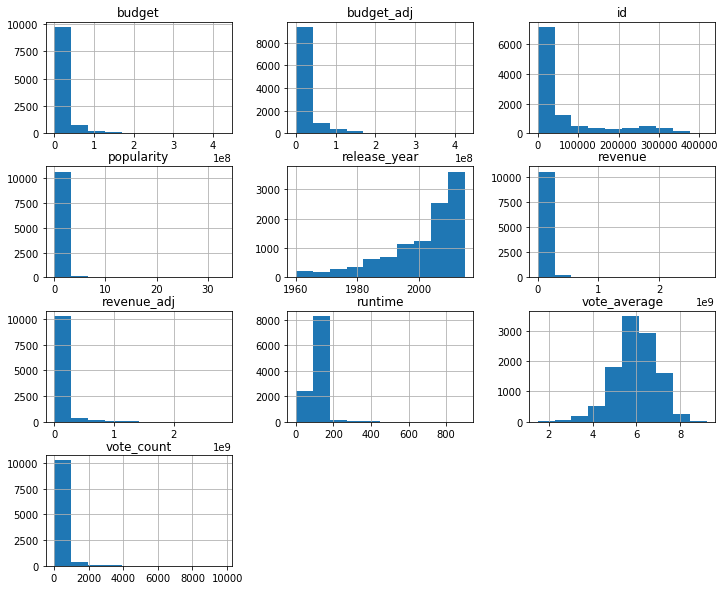

In [7]:
df.hist(figsize=(12,10))

From these histograms we get quick understanding how the data is distributed. Most of the parameters are right skewed. The __release_year__ is left skewed and __vote_average__ is closer to normal distribution.

### Data Cleaning

Now, after inspecting the dataset, we can prepare it for getting answers for our questions.  
First we want to remove duplicates.

In [8]:
df.drop_duplicates(inplace=True)
# We know that there were 10866 records and only one duplicate record, so there should be 10865 records now.
df.shape

(10865, 21)

Now let's keep only columns we need: runtime, genres, vote_average and release_year.

In [9]:
df = df.loc[:,["runtime", "genres", "vote_average", "release_year"]]
df.head(3)

,runtime,genres,vote_average,release_year
0,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,119,Adventure|Science Fiction|Thriller,6.3,2015


We found out that there are 31 records with runtime = 0. We can change these values to average runtime.

In [10]:
mean = int(df["runtime"].mean())
df["runtime"] = df["runtime"].apply(lambda x: mean if x == 0 else x)

In [11]:
df.describe()

,runtime,vote_average,release_year
count,10865.000000,10865.000000,10865.000000
mean,102.362816,5.975012,2001.321859
std,30.904045,0.935138,12.813260
min,2.000000,1.500000,1960.000000
25%,90.000000,5.400000,1995.000000
50%,99.000000,6.000000,2006.000000
75%,111.000000,6.600000,2011.000000
max,900.000000,9.200000,2015.000000


Now we are ready for exploring the data.

<a id='eda'></a>
## Exploratory Data Analysis

In [12]:
# plot user rating histogram
def rating_hist(df1, df2, df3, lbl1, lbl2, lbl3, title):
    plt.figure(figsize=(8,6))
    plt.hist(df1.vote_average, bins=15, alpha=0.5, label=lbl1)
    plt.hist(df2.vote_average, bins=15, alpha=0.5, label=lbl2)
    plt.hist(df3.vote_average, bins=15, alpha=0.5, label=lbl3)
    plt.legend()
    plt.title(title)
    plt.xlabel('User Rating')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(10))

### Are long or short movies get higher user rating?

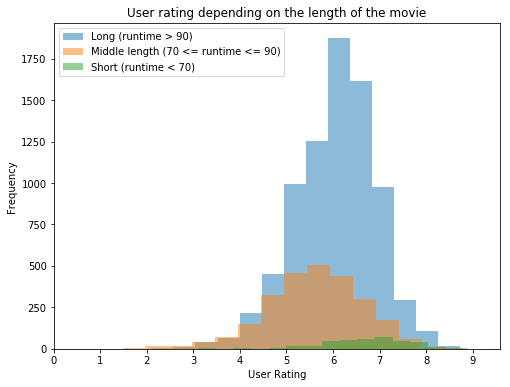

In [13]:
short = df.query("runtime < 70")
mid_len = df.query("70 <= runtime <= 90")
long = df.query("runtime > 90")

rating_hist(
    long,
    mid_len,
    short,
    "Long (runtime > 90)",
    "Middle length (70 <= runtime <= 90)",
    "Short (runtime < 70)",
    "User rating depending on the length of the movie"
)


This histogram shows interesting result.
In this dataset short movies more likely would get higher user rating and middle length movies less likely.

### Are old or new movies get higher user rating?

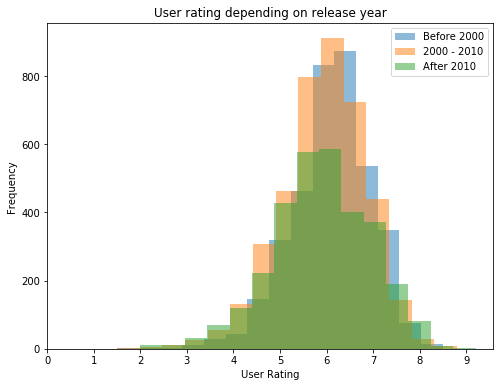

In [14]:
old = df.query("release_year < 2000")
early2000s = df.query("2000 <= release_year <= 2010")
new = df.query("release_year > 2010")

rating_hist(
    old,
    early2000s,
    new,
    "Before 2000",
    "2000 - 2010",
    "After 2010",
    "User rating depending on release year"
)

From this histogram we can see that there is a slight difference in user rating depending on the release year.
Older movies got a little bit higher rating and newer movies got lower rating.

### What genres are the most popular in this dataset?

To answer this question, we need to split records with genre into separate records with only one value of genre in each record.

In [15]:
df2 = pd.DataFrame(columns=["genre","year","vote_average"])
def append_row(df2, genre, year, vote_avg):
    return df2.append({"genre": genre, "year": year, "vote_average": vote_avg}, ignore_index=True)
    
for row in df.itertuples():
    genres = row.genres
    year = row.release_year
    vote_avg = row.vote_average
    if genres is np.nan:
        df2 = append_row(df2,"no info",year,vote_avg)
    else:
        for genre in genres.split("|"):
            df2 = append_row(df2,genre,year,vote_avg)

df2.head()

,genre,year,vote_average
0,Action,2015,6.5
1,Adventure,2015,6.5
2,Science Fiction,2015,6.5
3,Thriller,2015,6.5
4,Action,2015,7.1


In [16]:
def bar_chart(data, title, xlabel):
    plt.figure(figsize=(8,8))
    plt.barh(np.arange(len(data)), data, tick_label=data.index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Genre")

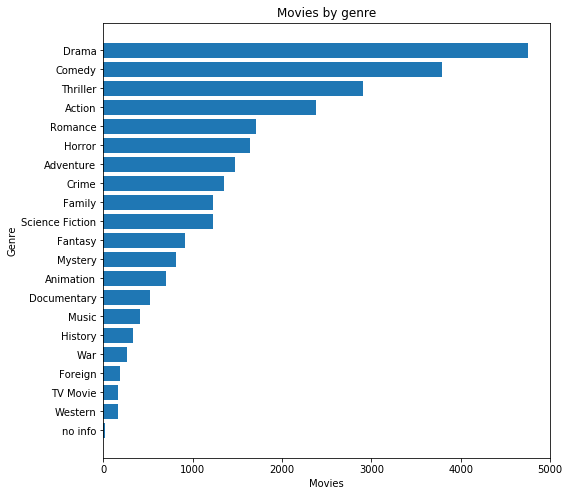

In [17]:
bar_chart(
    df2.genre.value_counts().sort_values(ascending=True),
    "Movies by genre",
    "Movies"
)

From this bar chart we can see that the most popular genre is __Drama__ and the least popular genre is __Western__.

### What genres are getting higher rating?

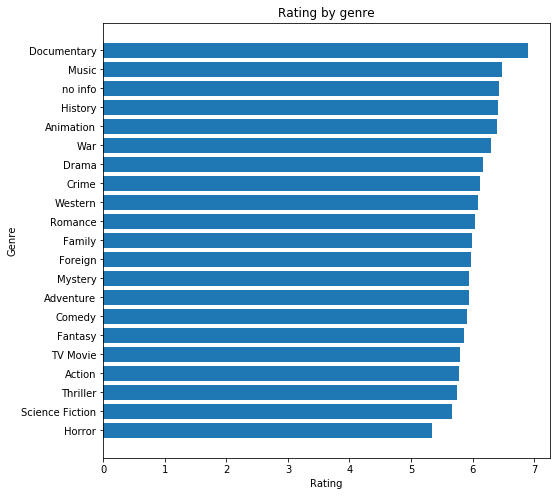

In [18]:
bar_chart(
    df2.groupby(["genre"]).vote_average.mean().sort_values(ascending=True),
    "Rating by genre",
    "Rating"
)

This chart shows that in this data set Documentaries on average got highest rating and Horror movies got lowest rating. 

<a id='conclusions'></a>
## Conclusions

By analyzing this IMDB dataset we found out what kind of movies got higher user rating:  
short (with runtime < 70), older (with release year before 2000), documentaries.